In [1]:
import pandas as pd

## Manipulación de DFs y Series

### Alineación de índices
Cuando operamos con dos series, pandas **alinea** los indices antes de realizar la operación.
Antes de realizar la operación tenemos que tener en cuenta que:
- los índices sean únicos
- los índices sean comunes a las dos series

Sino, van a obtener valores nulos o un resultado erroneo
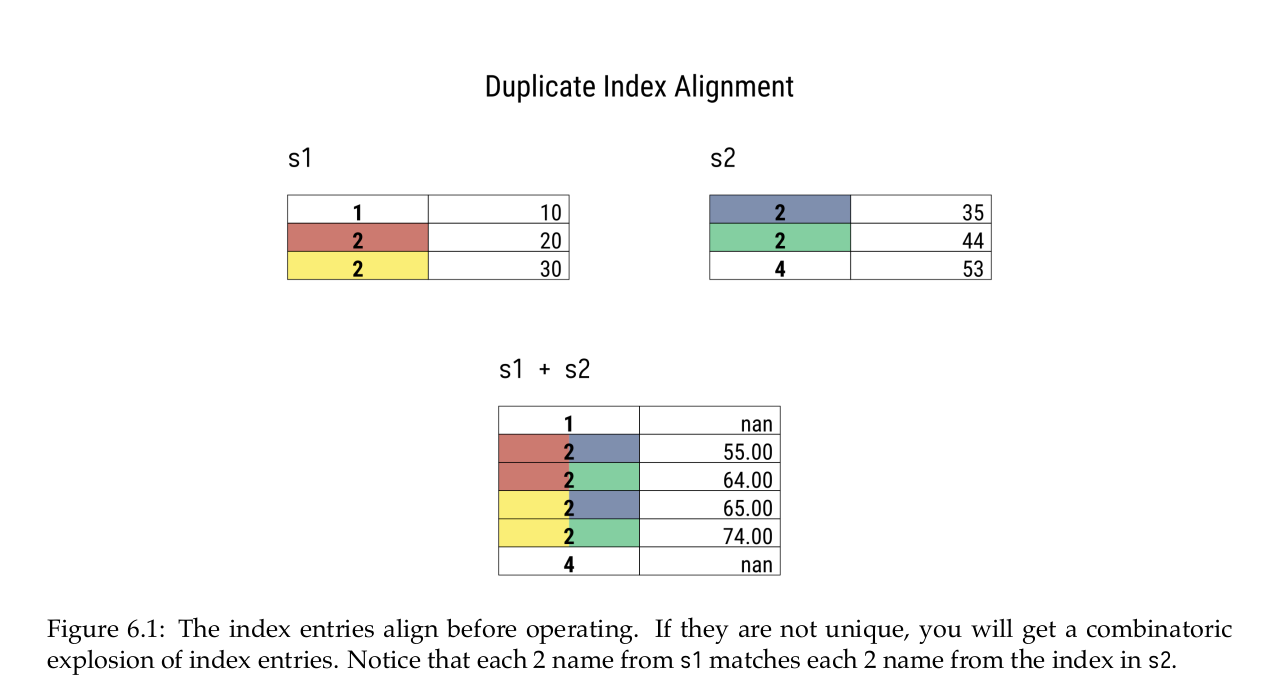


(Harrison, 2021)

### Filtros avanzados

La clase anterior vimos como filtrar un conjunto de datos.
Sin embargo no indagamos mucho en el tipo de datos de estos filtros. Veamos que pasa cuando preguntamos si el Ataque de un pokemon es superior a cierto valor.

In [2]:
data = pd.read_csv('pokemon_data.txt', sep=None)


<ipython-input-2-80b1183d3e25>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('pokemon_data.txt', sep=None)


In [3]:
filtro = data['Attack']>90
filtro

0      False
1      False
2      False
3       True
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Attack, Length: 800, dtype: bool

Cuando comparamos una serie contra un valor, el resultado es una nueva serie, con el mismo indice, donde cada elemento es un booleano que responde a la comparación.

Esto significa que podemos utilizar como filtro *cualquier* serie de tipo booleano con el mismo indice.

In [4]:
datos = pd.DataFrame(index=[10, 20], columns=["A", "B"])
datos.loc[10, "A"] = "10A"
datos.loc[10, "B"] = "10B"
datos.loc[20, "A"] = "20A"
datos.loc[20, "B"] = "20B"

filtro = pd.Series(index=[10, 20])
filtro.loc[10] = True
filtro.loc[20] = False

<ipython-input-4-c6801ac33a75>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  filtro = pd.Series(index=[10, 20])


In [5]:
datos

,A,B
10,10A,10B
20,20A,20B


In [6]:
filtro

10     True
20    False
dtype: object

In [7]:
datos[filtro]

,A,B
10,10A,10B


### Filtrar usando una isnull(), notnull()
Como `isnull` y `notnull` devuelven series booleanas, podemos utilizarla para filtrar la información y ver en que casos tenemos valores faltantes o no!

In [8]:
data = pd.read_csv("listings (1).csv.gz")

In [9]:
data[data['host_neighbourhood'].isnull()][['host_neighbourhood']].head()

,host_neighbourhood
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [10]:
data[data['host_neighbourhood'].notnull()][['host_neighbourhood']].head()

,host_neighbourhood
24,Indische Buurt
25,Grachtengordel
26,Westelijke Eilanden
27,Amsterdam Centrum
28,Amsterdam Centrum


### Duplicated, Sort, Unique
Supongamos que no queremos tener valores rerpetidos de listings.
1. Vamos a fijarnos si tenemos valores repetidos. Eso lo podemos hacer con el método `.duplicated`

In [11]:
data['listing_url'].duplicated(keep = 'first')

0       False
1       False
2       False
3       False
4       False
        ...  
6168    False
6169    False
6170    False
6171    False
6172    False
Name: listing_url, Length: 6173, dtype: bool

In [12]:
pd.Series.duplicated?

El resultado es una Serie booleana, por lo que la podemos utilizar como filtro!

In [13]:
data[data['listing_url'].duplicated(keep = 'first')]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


Por lo que vemos arriba, en este dataset no hay listings repetidos.



¿Habra hosts repetidos? Es decir, ¿Tendremos varios departamentos en alquiler con el mismo host?

In [14]:
data[data['host_id'].duplicated(keep = False)]['host_id']

3       238083700
6        81955946
9        30405589
11      114132046
13      238083700
          ...    
6159       913437
6161    384216171
6166    384216171
6167    384216171
6168    384216171
Name: host_id, Length: 1667, dtype: int64

In [15]:
# miramos un ejemplo en particular para tener una idea
data[data['host_id'] == 18081564][['bedrooms']]

,bedrooms
1277,15.0
5545,7.0


## Ejercicio 1:
- Limpiar el dataframe, de forma que nos quede un solo listing por host_id. El listing que debe quedar es el que tiene mas habitaciones (bedrooms).

## Tipos de datos
Como ya se habrán dado cuenta, los datos dentro de las Series y los DFs tiene un tipo de dato 🤷
Los datos puede ser de cualquier tipo y los podemos pasar de un tipo de dato a otro.

Abajo vemos que el id es un número.  Muchas veces, resulta útil guardar los ids como strings. Esto lo podemos hacer con el método `astype`

In [16]:
data['id'].head(5).tolist()

[23726706, 35815036, 31553121, 34745823, 44586947]

In [17]:
data['id'] = data['id'].astype('str')

In [18]:
data['id'].head(5).tolist()

['23726706', '35815036', '31553121', '34745823', '44586947']

También es útil definir el tipo de dato cuando leemos el archivo para evitar pérdidas de información. Por ejemplo, supongamos que tenemos un id que empieza con ceros, 000034.
Cuando pandas lea ese dato, si no le decimos que es una string, lo va a leer como un número y vamos a perder los 0000.

Para definir el tipo de dato podemos hacer lo siguiente:

In [20]:
data = pd.read_csv('listings (1).csv.gz', dtype = {'id':'str'})

In [21]:
data['id'].tolist()[:10]

['23726706',
 '35815036',
 '31553121',
 '34745823',
 '44586947',
 '15801253',
 '19572024',
 '18801518',
 '2973384',
 '34985473']

### Apply
Aplica una función a través de un eje del DF/Series

In [22]:
def funcion_raiz(x):
  return x ** 0.5

funcion_raiz(16)

4.0

In [23]:
funcion_raiz_lambda = lambda x: x ** 0.5
funcion_raiz(16)

4.0

In [24]:
data['review_scores_value'].apply(funcion_raiz_lambda)


0       2.206808
1       2.197726
2       2.142429
3       2.213594
4       2.190890
          ...   
6168    2.121320
6169    2.172556
6170         NaN
6171    2.179449
6172    2.181742
Name: review_scores_value, Length: 6173, dtype: float64

#### Función Lambda
Esta función la vieron en Prog I y ahora la vamos a ver aplicada a DFs

Vamos a limpiar los datos de precio que habíamos visto:
- quitamos el `$`
- quitamos la `,`
- transformamos a float

In [25]:
data['price'].head()

0     $88.00
1    $105.00
2    $152.00
3     $87.00
4    $160.00
Name: price, dtype: object

In [26]:
data['price'].describe()

count        6173
unique        532
top       $150.00
freq          249
Name: price, dtype: object

In [27]:
data['price_clean'] = data['price'].apply(lambda s: float(s.replace('$', '').replace(',', '')))
data['price_clean'].describe()

count    6173.000000
mean      198.019601
std       140.546979
min         0.000000
25%       115.000000
50%       160.000000
75%       240.000000
max      2500.000000
Name: price_clean, dtype: float64

## Ejercicio 2
Investigar y utilizar en ejemplos las siguientes funciones o métodos:
- clip
- mask
- where

### Groupby
Nos sirve para generar grupos de datos usando una Serie del DF. En la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) encontramos:
>A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [29]:
data = pd.read_csv('pokemon_data.txt', sep=None)
data

<ipython-input-29-35bae7f34c6f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('pokemon_data.txt', sep=None)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [30]:
data.groupby('Generation')['Attack'].mean()

Generation
1    76.638554
2    72.028302
3    81.625000
4    82.867769
5    82.066667
6    75.804878
Name: Attack, dtype: float64

In [31]:
data.groupby(['Generation', 'Legendary'])['Attack'].median()

Generation  Legendary
1           False         71.0
            True         105.0
2           False         70.0
            True          90.0
3           False         72.0
            True         100.0
4           False         77.0
            True         105.0
5           False         75.0
            True         120.0
6           False         66.0
            True         120.5
Name: Attack, dtype: float64

## Graficar

### Boxplot
Sirve para ver la dispersión de una variable

<Axes: >

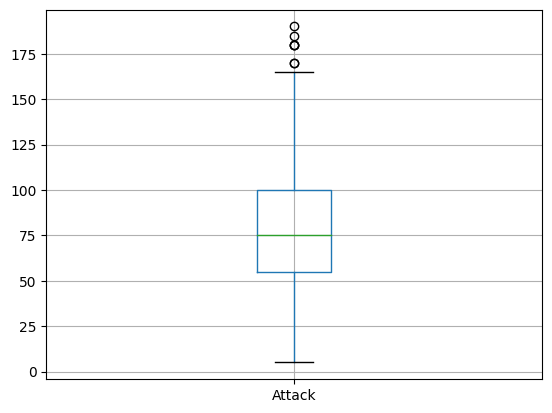

In [33]:
data.boxplot("Attack")

<Axes: title={'center': 'Attack'}, xlabel='Legendary'>

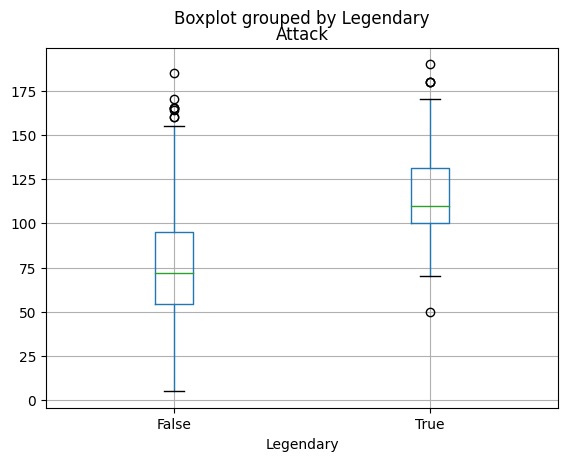

In [34]:
data.boxplot("Attack", by="Legendary")

### Grafico de barra
Sirve para mostrar las cantidades de una variable categorica.

<Axes: xlabel='Legendary'>

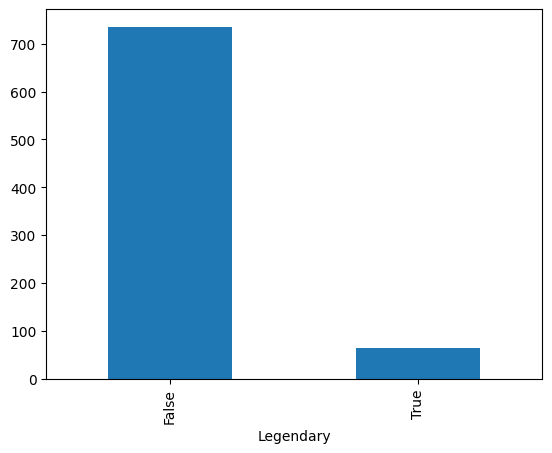

In [35]:
data.groupby('Legendary').count()['#'].plot.bar()

### Grafico de torta

Sirve para ver porcentajes.

Se utilizan en aquellos casos donde interesa no mostrar el número de veces que ocurre una variable categorica, si no que interesa visualizar mejor la proporción en que aparece esa característica respecto del total.

A pesar de su popularidad, se trata de un tipo de gráfico poco recomendable debido a que nuestra capacidad perceptual para estimar relaciones de proporción o diferencias entre áreas de sectores circulares es mucho menor que, por ejemplo, entre longitudes o posiciones, tal y como sucede en otras gráficas.



<Axes: ylabel='#'>

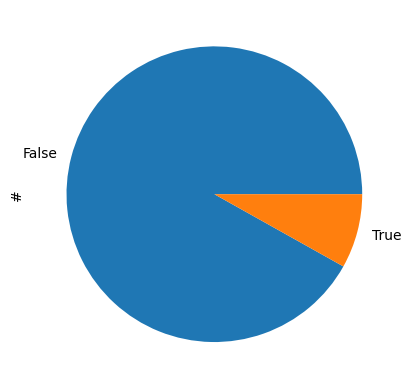

In [38]:
data.groupby('Legendary').count()['#'].plot.pie()